In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# From Model to Production

## The Practice of Deep Learning

### Starting Your Project

### The State of Deep Learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

#### Other data types

### The Drivetrain Approach

## Gathering Data

# clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [3]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [5]:
dest_dir = 'images'
# if os.path.exists(dest_dir):
#     Path(dest_dir).unlink()

dest = os.path.join(dest_dir, 'grizzly.jpg')

# Ensure the directory exists
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Remove the file if it exists
if os.path.exists(dest):
    os.remove(dest)

# Download the image
download_url(ims[0], dest)

Path('images/grizzly.jpg')

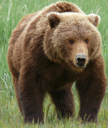

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

In [7]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [8]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)
fns

(#929) [Path('bears/black/0079fa29-5db6-4e85-b473-d5f3a26a7949.jpg'),Path('bears/black/038bdfb3-6d0a-412d-b054-c7d6b4ae629d.jpg'),Path('bears/black/0415ff22-3a96-426a-b0f6-8d9d709cadcc.jpg'),Path('bears/black/042a51f1-5a1c-4610-83a6-6a1f324af091.jpg'),Path('bears/black/0514f523-69e7-4195-830c-2d1058734403.jpg'),Path('bears/black/0a02591a-06be-4399-a50b-7dfdf87ea08d.jpg'),Path('bears/black/0a6f25d4-3ed9-4bbf-bbaa-876ac16ac3e0.JPG'),Path('bears/black/0a985ba7-5675-4523-90d0-304b6e691017.jpg'),Path('bears/black/0abf3212-6d66-4628-92eb-77d6649082bd.jpg'),Path('bears/black/0aff9839-9100-4a7d-a43f-fa2a2e83ea0f.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#0) []

In [11]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

## From Data to DataLoaders

In [12]:
path = 'bears'
the_path = Path(path)
the_path = Path(os.path.join(the_path.parent, path))
print(the_path.absolute())

print(f"Path: {Path(the_path)}")
print(f"Number of images: {len(get_image_files(the_path))}")
print(f"No of files: {get_image_files(the_path)}")
#get the absolute path of path
print(f"Absolute path: {the_path.absolute()}")

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

/workspaces/fastbook/bears
Path: bears
Number of images: 929
No of files: [Path('bears/black/0079fa29-5db6-4e85-b473-d5f3a26a7949.jpg'), Path('bears/black/038bdfb3-6d0a-412d-b054-c7d6b4ae629d.jpg'), Path('bears/black/0415ff22-3a96-426a-b0f6-8d9d709cadcc.jpg'), Path('bears/black/042a51f1-5a1c-4610-83a6-6a1f324af091.jpg'), Path('bears/black/0514f523-69e7-4195-830c-2d1058734403.jpg'), Path('bears/black/0a02591a-06be-4399-a50b-7dfdf87ea08d.jpg'), Path('bears/black/0a6f25d4-3ed9-4bbf-bbaa-876ac16ac3e0.JPG'), Path('bears/black/0a985ba7-5675-4523-90d0-304b6e691017.jpg'), Path('bears/black/0abf3212-6d66-4628-92eb-77d6649082bd.jpg'), Path('bears/black/0aff9839-9100-4a7d-a43f-fa2a2e83ea0f.jpg'), Path('bears/black/0b16fbca-ea3f-4d8a-8fd9-aeae71be7abf.jpg'), Path('bears/black/0bff3185-2605-4165-ac03-02f14b61fc2f.jpeg'), Path('bears/black/0c58a417-3c6c-423b-9815-27e7031edd68.jpg'), Path('bears/black/0c863aba-d3a2-4c98-87d1-ac3746a551e6.jpg'), Path('bears/black/0c9ca240-3268-4862-b745-bc8727184e97.j

In [13]:
dls = bears.dataloaders(the_path)

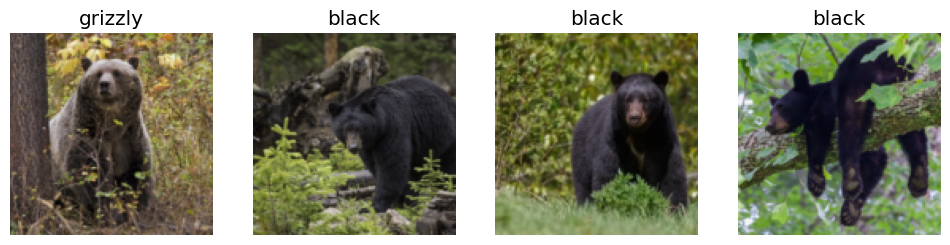

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

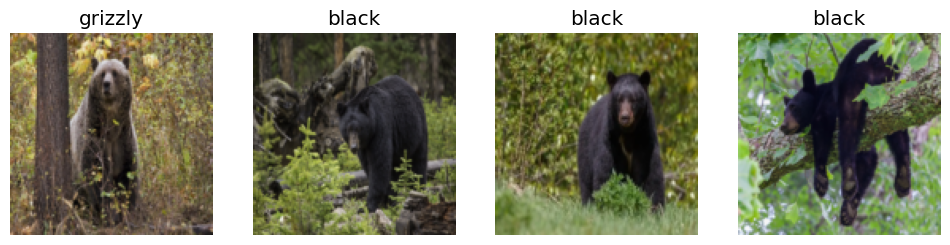

In [28]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

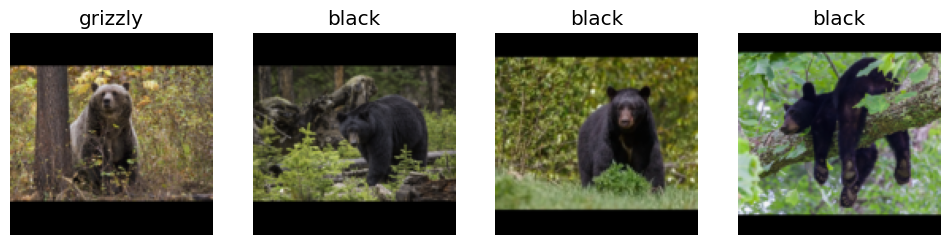

In [15]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

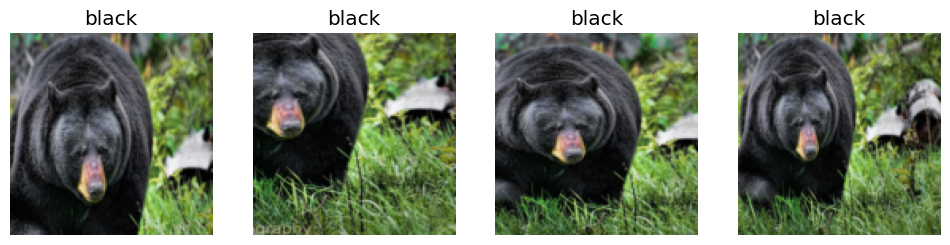

In [16]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

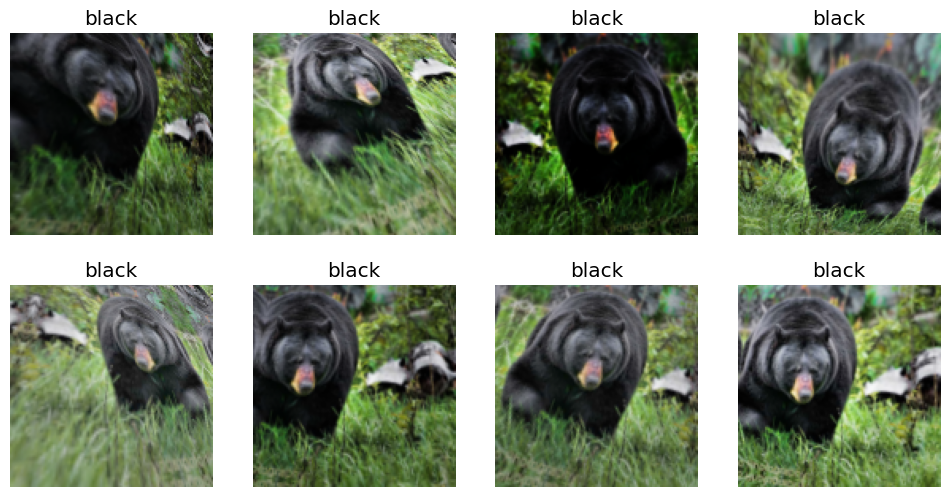

In [17]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [18]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.960634,0.141275,0.037838,00:28


/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.223306,0.092720,0.016216,00:26
1,0.161823,0.060041,0.016216,00:26
2,0.132084,0.052693,0.016216,00:26
3,0.116646,0.046326,0.016216,00:27


/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/workspaces/fastbook/venv/lib/python3.11/site

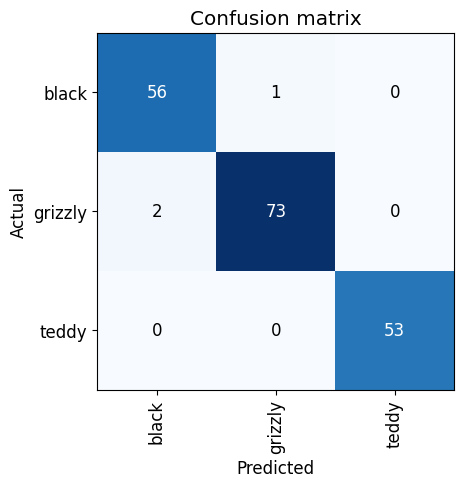

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

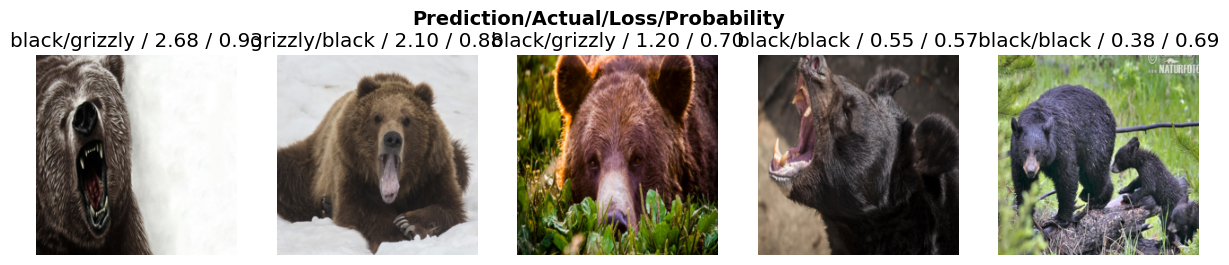

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/workspaces/fastbook/venv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [27]:
learn.export()

In [28]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [29]:
learn_inf = load_learner(path/'export.pkl')

In [30]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([2.8271e-03, 9.9717e-01, 4.4468e-06]))

In [31]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Creating a Notebook App from the Model

In [33]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [34]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred,pred_idx,probs = learn_inf.predict(img)

In [38]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9972')

In [39]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [40]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [41]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [42]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [43]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: contrib dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert nbextensions_configurator notebook run
server troubleshoot trust

Jupyter c

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.

In [45]:
from nbdev.export import notebook2script
notebook2script("app.ipynb")

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/workspaces/fastbook/venv/lib/python3.11/site-packages/nbdev/export.py)